In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imtkaggleteam/international-airlines-traffic-by-city-pairs")

print("Path to dataset files:", path)

In [ ]:
from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

path = kagglehub.dataset_download("imtkaggleteam/international-airlines-traffic-by-city-pairs")

destination = '/content/drive/My Drive/kaggle_datasets/international-airlines-traffic'

os.makedirs(destination, exist_ok=True)

shutil.copytree(path, destination, dirs_exist_ok=True)

print(f"The dataset was copied to: {destination}")

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_datasets/international-airlines-traffic/city_pairs.csv')

In [5]:
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000
mean,4561.972380,167.342670,7.442728,4491.480743,148.406850,4.628451,9053.453124,315.749520,12.071179,2003.077541,6.498959
std,8564.725065,407.415238,23.809746,8416.198365,363.853783,14.769693,16905.519449,728.108373,34.345207,11.222014,3.472430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,128.000000,0.002000,0.000000,133.000000,0.011750,0.000000,284.000000,0.781000,0.000000,1994.000000,3.000000
50%,1290.000000,14.962000,0.000000,1265.000000,14.072000,0.000000,2573.000000,43.536000,0.105000,2001.000000,7.000000
75%,4831.000000,136.583750,1.703000,4698.250000,118.125500,1.551250,9614.000000,275.003250,4.932000,2013.000000,10.000000
max,90926.000000,6764.923000,393.705000,91078.000000,4996.582000,382.229000,170469.000000,9889.553000,566.993000,2025.000000,12.000000


In [6]:
data.isnull().sum()

,0
Month,0
AustralianPort,0
ForeignPort,0
Country,0
Passengers_In,0
Freight_In_(tonnes),0
Mail_In_(tonnes),0
Passengers_Out,0
Freight_Out_(tonnes),0
Mail_Out_(tonnes),0


In [7]:
column_names = data.columns.tolist()
print(column_names)

['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num']


In [8]:
print(data[['Year', 'Month_num']].head(10))

   Year  Month_num
0  1985          1
1  1985          1
2  1985          1
3  1985          1
4  1985          1
5  1985          1
6  1985          1
7  1985          1
8  1985          1
9  1985          1


In [9]:
data['date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month_num'].astype(str) + '-01')

In [10]:
passenger_trend = data[['date', 'Passengers_In', 'Passengers_Out']].groupby('date').sum().reset_index()

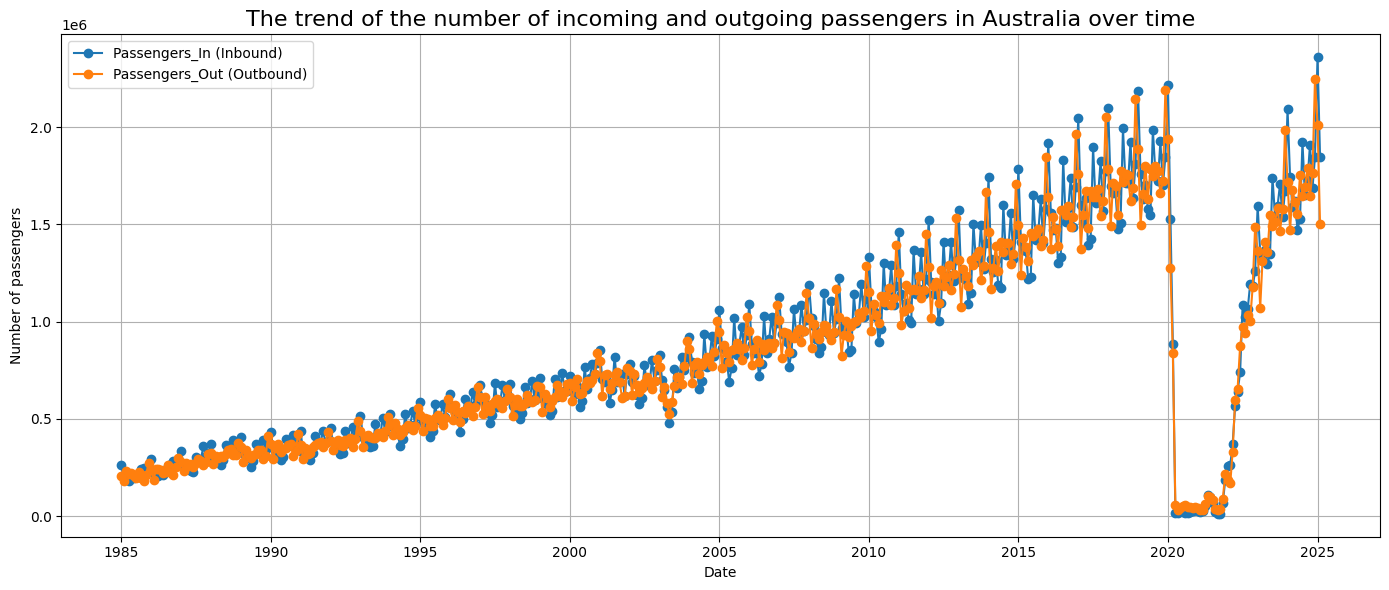

In [11]:
plt.figure(figsize=(14, 6))

plt.plot(passenger_trend['date'], passenger_trend['Passengers_In'], label='Passengers_In (Inbound)', marker='o')
plt.plot(passenger_trend['date'], passenger_trend['Passengers_Out'], label='Passengers_Out (Outbound)', marker='o')

plt.title('The trend of the number of incoming and outgoing passengers in Australia over time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
data['city_pair'] = data['AustralianPort'] + ' ↔ ' + data['ForeignPort']
top_routes = data.groupby('city_pair')[['Passengers_In', 'Passengers_Out']].sum()
top_routes['Total_Passengers'] = top_routes['Passengers_In'] + top_routes['Passengers_Out']
top_routes_sorted = top_routes.sort_values(by='Total_Passengers', ascending=False).reset_index()

/tmp/ipython-input-3576780279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes_sorted.head(10), x='Total_Passengers', y='city_pair', palette='viridis')


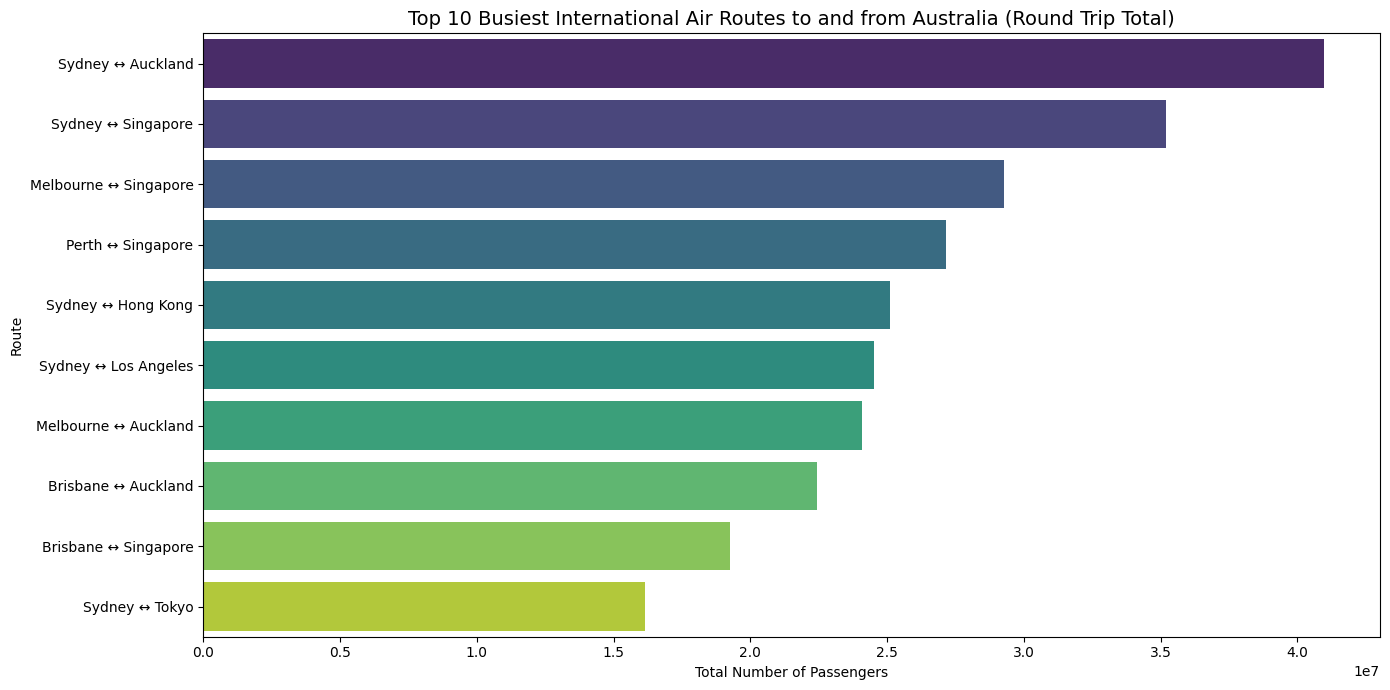

In [13]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_routes_sorted.head(10), x='Total_Passengers', y='city_pair', palette='viridis')

plt.title('Top 10 Busiest International Air Routes to and from Australia (Round Trip Total)', fontsize=14)
plt.xlabel('Total Number of Passengers')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


In [14]:
country_traffic = data.groupby('Country')[['Passengers_In', 'Passengers_Out']].sum()

country_traffic['Total_Passengers'] = country_traffic['Passengers_In'] + country_traffic['Passengers_Out']

country_traffic_sorted = country_traffic.sort_values(by='Total_Passengers', ascending=False).reset_index()


/tmp/ipython-input-165128693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_traffic_sorted.head(10), x='Total_Passengers', y='Country', palette='mako')


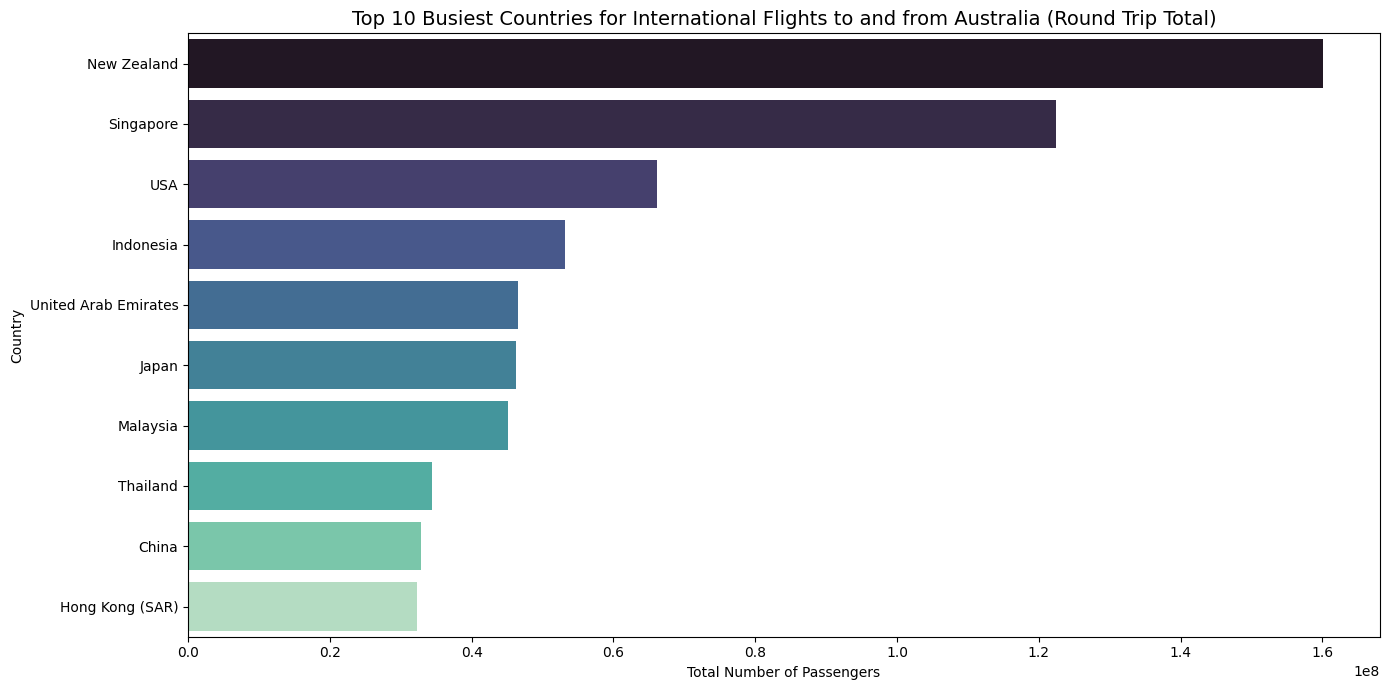

In [15]:
plt.figure(figsize=(14, 7))
sns.barplot(data=country_traffic_sorted.head(10), x='Total_Passengers', y='Country', palette='mako')

plt.title('Top 10 Busiest Countries for International Flights to and from Australia (Round Trip Total)', fontsize=14)
plt.xlabel('Total Number of Passengers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [16]:
freight_traffic = data.groupby('Country')[['Freight_In_(tonnes)', 'Freight_Out_(tonnes)']].sum()

freight_traffic['Total_Freight'] = freight_traffic['Freight_In_(tonnes)'] + freight_traffic['Freight_Out_(tonnes)']

freight_traffic_sorted = freight_traffic.sort_values(by='Total_Freight', ascending=False).reset_index()


/tmp/ipython-input-4144710748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freight_traffic_sorted.head(10), x='Total_Freight', y='Country', palette='coolwarm')


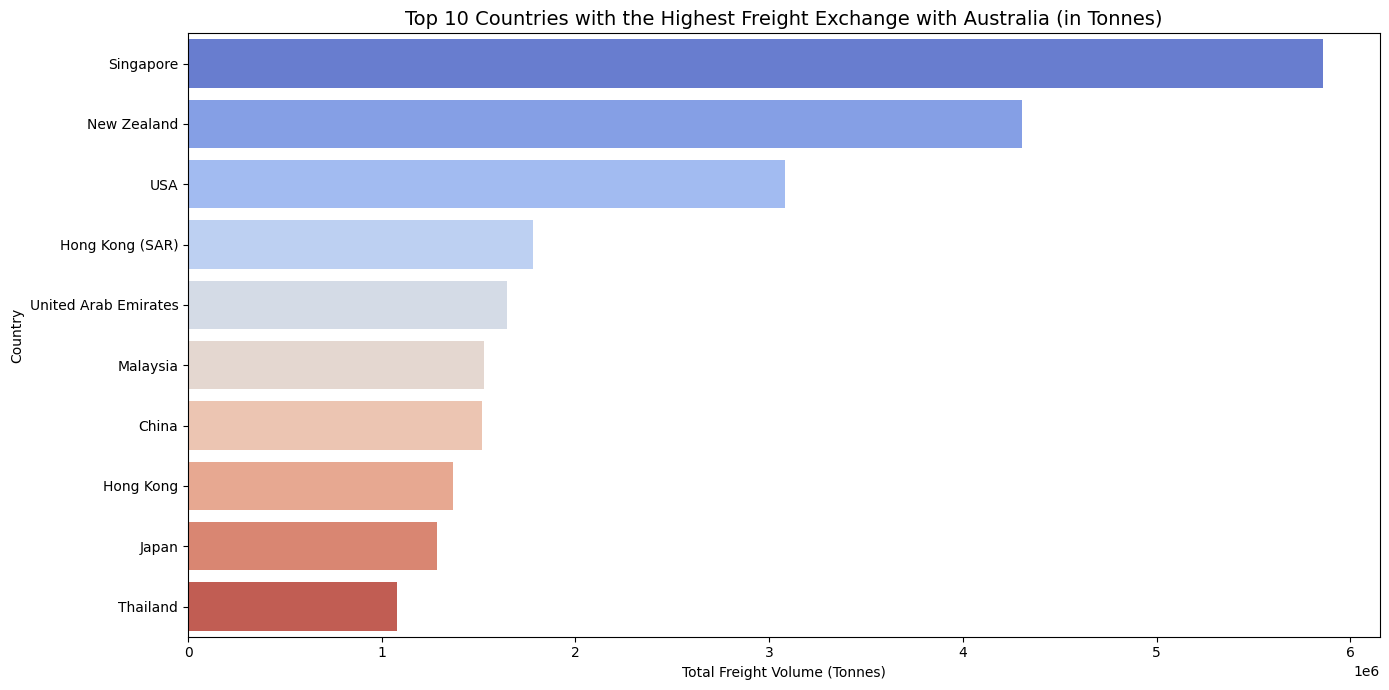

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(data=freight_traffic_sorted.head(10), x='Total_Freight', y='Country', palette='coolwarm')

plt.title('Top 10 Countries with the Highest Freight Exchange with Australia (in Tonnes)', fontsize=14)
plt.xlabel('Total Freight Volume (Tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [18]:
mail_traffic = data.groupby('Country')[['Mail_In_(tonnes)', 'Mail_Out_(tonnes)']].sum()

mail_traffic['Total_Mail'] = mail_traffic['Mail_In_(tonnes)'] + mail_traffic['Mail_Out_(tonnes)']

mail_traffic_sorted = mail_traffic.sort_values(by='Total_Mail', ascending=False).reset_index()


/tmp/ipython-input-2900870983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mail_traffic_sorted.head(10), x='Total_Mail', y='Country', palette='Purples_r')


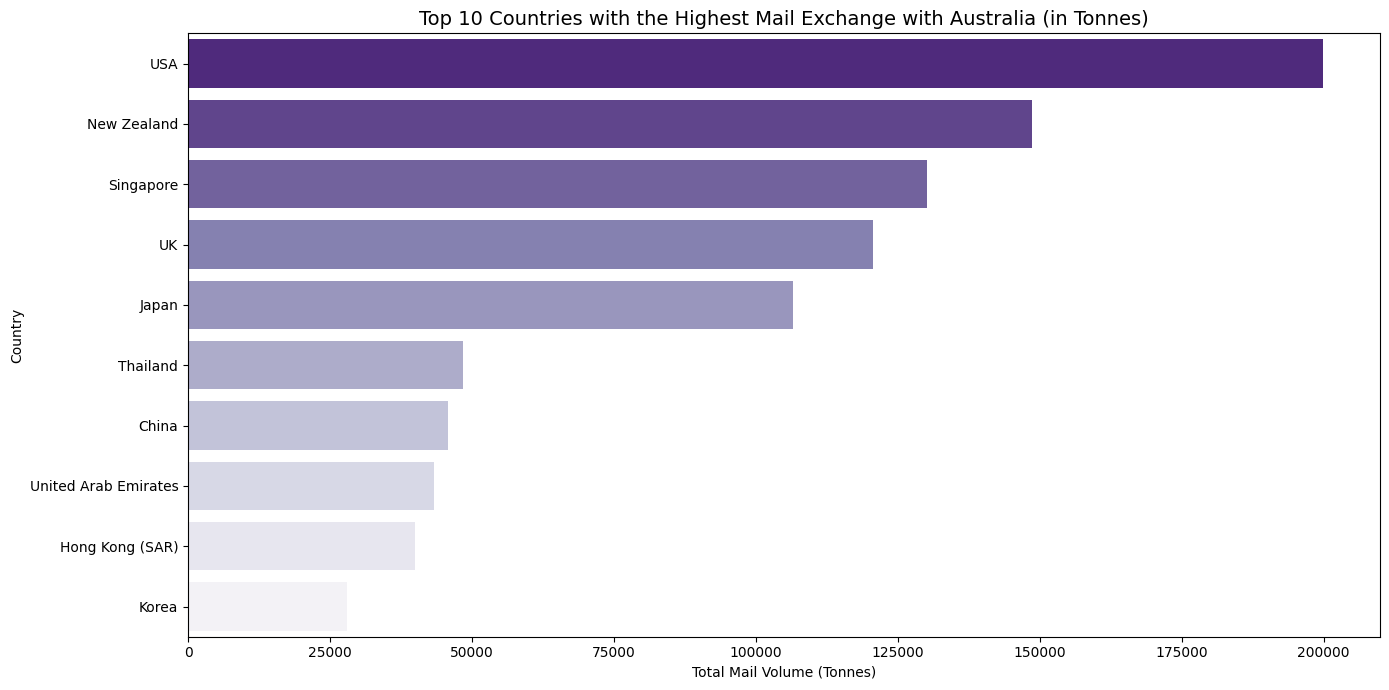

In [19]:
plt.figure(figsize=(14, 7))
sns.barplot(data=mail_traffic_sorted.head(10), x='Total_Mail', y='Country', palette='Purples_r')

plt.title('Top 10 Countries with the Highest Mail Exchange with Australia (in Tonnes)', fontsize=14)
plt.xlabel('Total Mail Volume (Tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


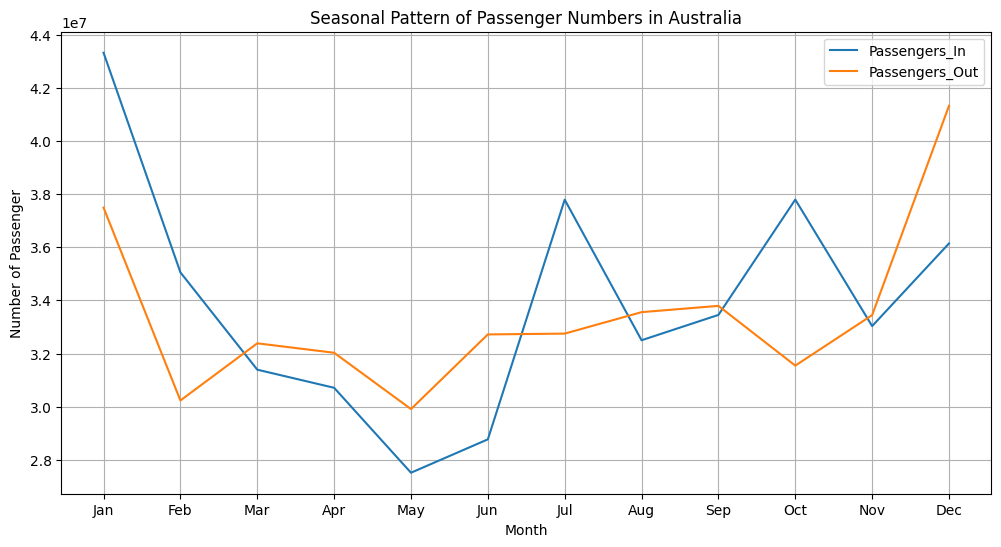

In [20]:
monthly_passengers = data.groupby(['Month_num'])[['Passengers_In', 'Passengers_Out']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_passengers['Month_num'], monthly_passengers['Passengers_In'], label='Passengers_In')
plt.plot(monthly_passengers['Month_num'], monthly_passengers['Passengers_Out'], label='Passengers_Out')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Seasonal Pattern of Passenger Numbers in Australia')
plt.xlabel('Month')
plt.ylabel('Number of Passenger')
plt.legend()
plt.grid(True)
plt.show()


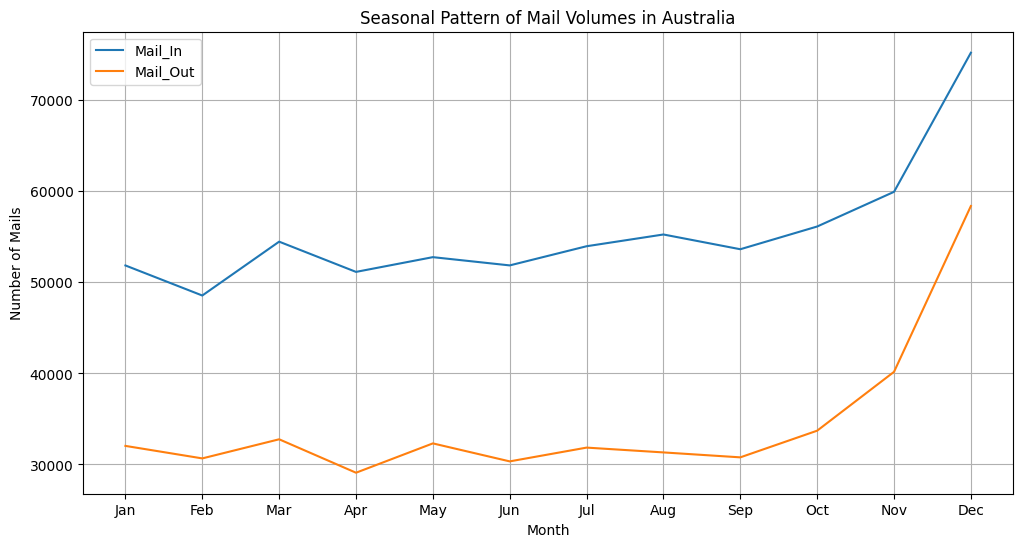

In [21]:
monthly_mails = data.groupby(['Month_num'])[['Mail_In_(tonnes)', 'Mail_Out_(tonnes)']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_mails['Month_num'], monthly_mails['Mail_In_(tonnes)'], label='Mail_In')
plt.plot(monthly_mails['Month_num'], monthly_mails['Mail_Out_(tonnes)'], label='Mail_Out')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Seasonal Pattern of Mail Volumes in Australia')
plt.xlabel('Month')
plt.ylabel('Number of Mails')
plt.legend()
plt.grid(True)
plt.show()


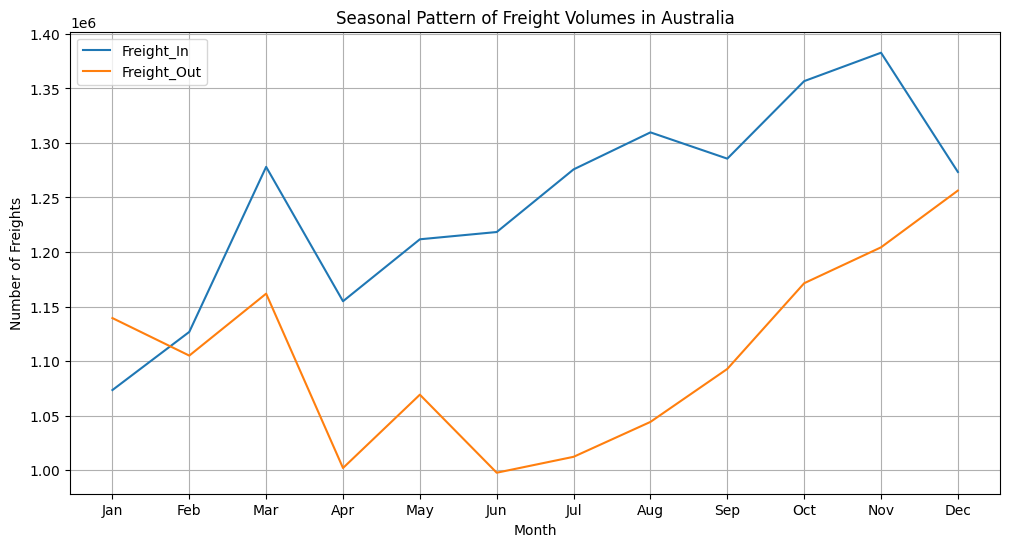

In [22]:
monthly_passengers = data.groupby(['Month_num'])[['Freight_In_(tonnes)', 'Freight_Out_(tonnes)']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_passengers['Month_num'], monthly_passengers['Freight_In_(tonnes)'], label='Freight_In')
plt.plot(monthly_passengers['Month_num'], monthly_passengers['Freight_Out_(tonnes)'], label='Freight_Out')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Seasonal Pattern of Freight Volumes in Australia')
plt.xlabel('Month')
plt.ylabel('Number of Freights')
plt.legend()
plt.grid(True)
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3t_6b6o/8ut8gq5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3t_6b6o/cgyiszvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97824', 'data', 'file=/tmp/tmpv3t_6b6o/8ut8gq5n.json', 'init=/tmp/tmpv3t_6b6o/cgyiszvq.json', 'output', 'file=/tmp/tmpv3t_6b6o/prophet_modeljkhcyjxc/prophet_model-20250806182557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


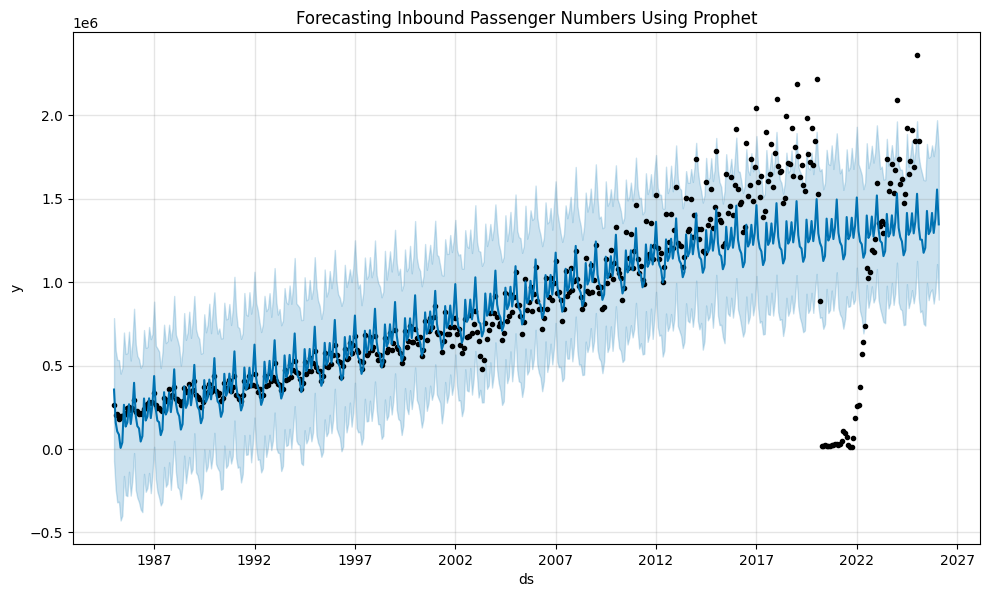

In [24]:
from prophet import Prophet

prophet_df = data.groupby('date')['Passengers_In'].sum().reset_index()
prophet_df.rename(columns={'date': 'ds', 'Passengers_In': 'y'}, inplace=True)

model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Forecasting Inbound Passenger Numbers Using Prophet')
plt.show()
